In [43]:
#
import pandas as pd 
import numpy as np 
import string  

from sklearn.datasets import make_blobs   # simulate datasets

import seaborn as sns    # help understand data patterns
import plotly.express as px 
import plotly.figure_factory as ff 

In [44]:
# setup datasets 
num_samples = 50 
num_features = 5 
# * to unpack to ['a', 'b', 'c', 'd', 'e']
# without unpact it is ['abcde']
cols = [*string.ascii_lowercase[:num_features]]   # feature name

In [45]:
cols

['a', 'b', 'c', 'd', 'e']

In [46]:
# create dataset
data, target = make_blobs(n_samples = num_samples, 
                          n_features = num_features,
                          random_state = 3, 
                          center_box = (0,100),
                          cluster_std = 10)

In [47]:
df = pd.DataFrame(data, columns = cols).astype(int)

In [48]:
df.head()

,a,b,c,d,e
0,1,45,76,18,69
1,67,52,36,44,88
2,-3,66,63,30,60
3,6,59,56,43,66
4,57,67,39,53,82


In [49]:
# add target column
df['target'] = target

In [50]:
df.head(5)

,a,b,c,d,e,target
0,1,45,76,18,69,2
1,67,52,36,44,88,0
2,-3,66,63,30,60,2
3,6,59,56,43,66,2
4,57,67,39,53,82,0


In [51]:
# pairplot / scatterplot matrix

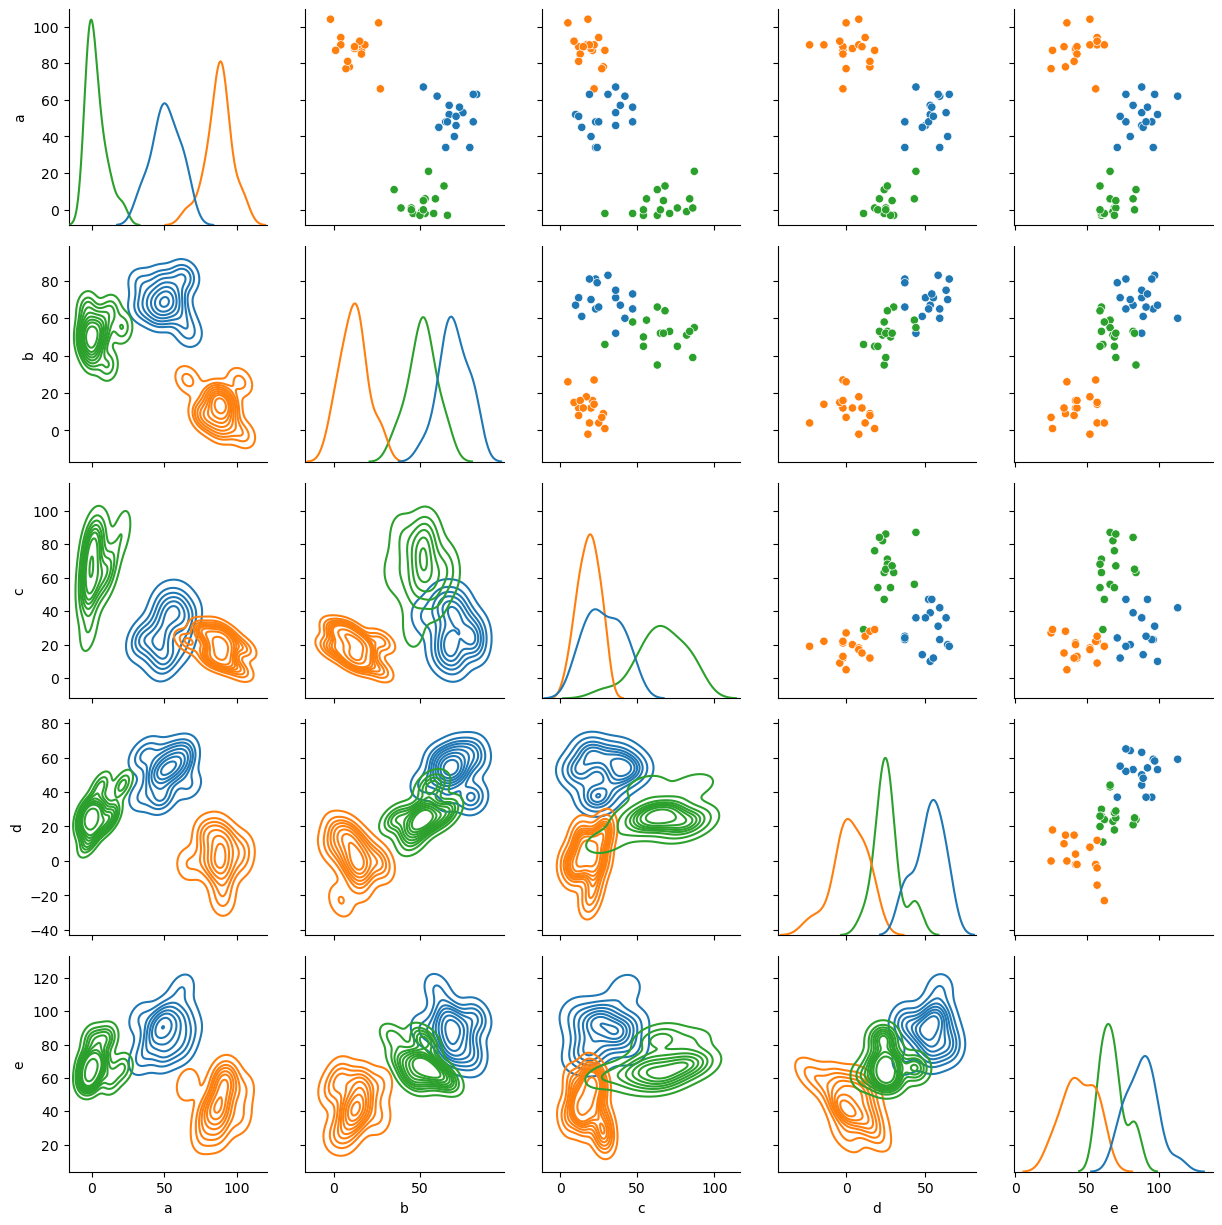

In [52]:
g = sns.PairGrid(df, hue='target', palette='tab10')  # create grid
g.map_upper(sns.scatterplot)   # upper paart 
g.map_diag(sns.kdeplot)   # diagonal
g.map_lower(sns.kdeplot)   # lower part
# useful to see data relationship and distribution 

In [53]:
# create dendrogram

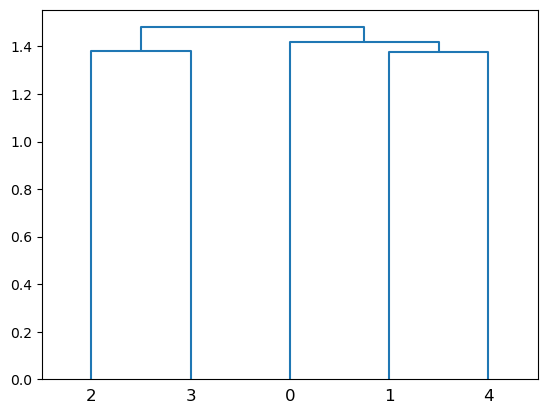

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hc
import numpy as np

m = 5
dates = pd.date_range('2013-01-01', periods=365)
random_returns = np.random.normal(0, 0.01, size=(len(dates), m))

dataframe = pd.DataFrame(data=random_returns, index=dates)
corr = dataframe.corr() 

z = hc.linkage(corr.values, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns)
plt.show()

In [66]:
# Parallel Coordinate Plot

In [67]:
df.columns

Index(['a', 'b', 'c', 'd', 'e', 'target'], dtype='object')

<Axes: >

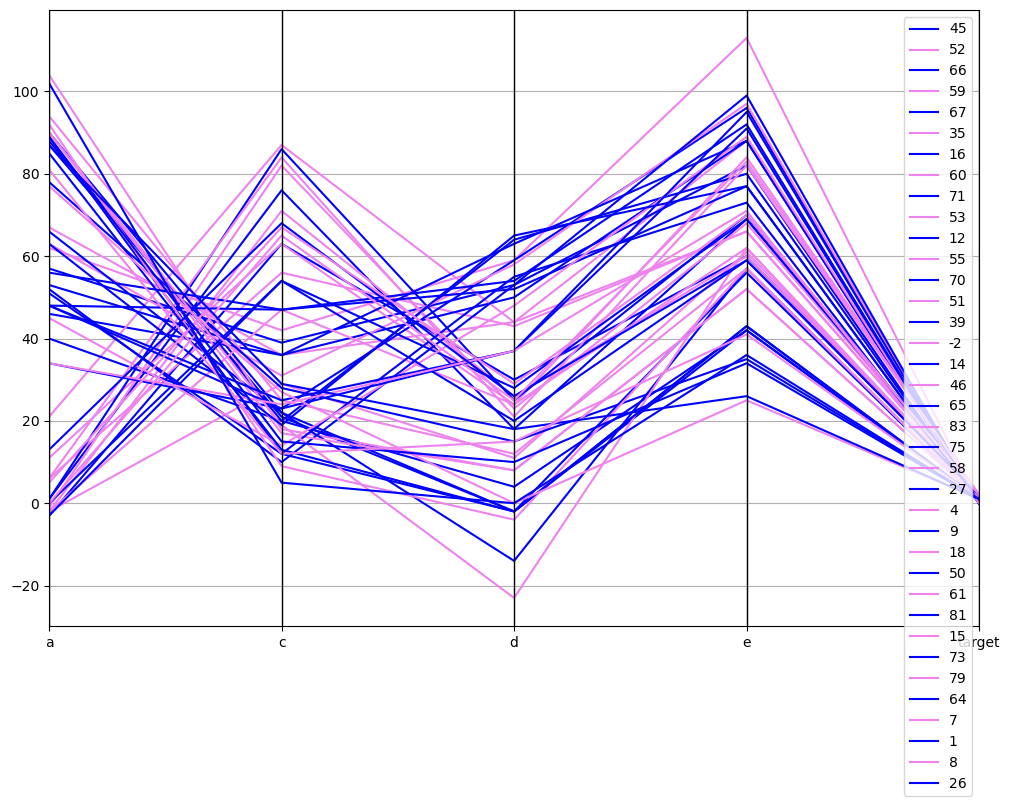

In [68]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,8))
parallel_coordinates(df, 'b', color=['Blue','violet'])